<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#TaFeng" data-toc-modified-id="TaFeng-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>TaFeng</a></span></li><li><span><a href="#Instacart" data-toc-modified-id="Instacart-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Instacart</a></span></li><li><span><a href="#ValuedShopper" data-toc-modified-id="ValuedShopper-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>ValuedShopper</a></span></li></ul></div>

In [23]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
# we have 3 datasets: TaFeng, Instacart, ValuedShopper
# sebastian academic style settings
plt.rcParams['pdf.fonttype'] = 42
plt.rc('text', usetex=True)
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['legend.fontsize'] = 16

plt.rcParams['lines.markersize'] = 2
plt.rc('axes', labelsize=28) 
plt.rc('xtick', labelsize=22) 
plt.rc('ytick', labelsize=22)
plt.rc('savefig', dpi=300)

# TaFeng

In [24]:
hist_file = "../data/TaFang_history_NB.csv"
future_file = "../data/TaFang_future_NB.csv"

hist_df = pd.read_csv(hist_file)
future_df = pd.read_csv(future_file)
hist_df

,CUSTOMER_ID,ORDER_NUMBER,MATERIAL_NUMBER
0,1,1,1
1,1,1,2
2,1,1,3
3,1,2,4
4,1,2,5
...,...,...,...
494012,13948,2,1218
494013,13949,1,3571
494014,13949,1,299
494015,13949,1,41


In [25]:
num_customer = hist_df["CUSTOMER_ID"].unique().size
print("num of customers:",num_customer)

num_customer = hist_df["MATERIAL_NUMBER"].unique().size
print("num of items:",num_customer)
basket_size_series = hist_df.groupby(["CUSTOMER_ID", "ORDER_NUMBER"]).count()["MATERIAL_NUMBER"]
basket_size_avg = basket_size_series.mean()
print("avg basket size:", basket_size_avg)

baskets_per_user_series = \
hist_df[["CUSTOMER_ID", "ORDER_NUMBER"]].drop_duplicates().groupby(["CUSTOMER_ID"]).count()["ORDER_NUMBER"]
baskets_per_user_series
print("avg basket per user:", baskets_per_user_series.mean())

print("number of baskets:", hist_df[["CUSTOMER_ID", "ORDER_NUMBER"]].drop_duplicates().shape[0])

num of customers: 13949
num of items: 11997
avg basket size: 6.220074789418682
avg basket per user: 5.693813176571798
number of baskets: 79423


In [26]:
# what is the percentage of baskets with repeated purchases?
import sys
sys.path.append("..") # Adds higher directory to python modules path.

from dataset import Dataset
dataset = Dataset()
# loading real data
dataset.load_from_file(hist_file)
# convert baskets to one hot encoded

dataset.vectorize(vocabulary=dataset.item_ids)

print(dataset)


number of records in ../data/TaFang_history_NB.csv: 494017
customers: 13949, unique items: 11997


percentage: 0.3630938141344447
average repeat distance: 2.816006657881961


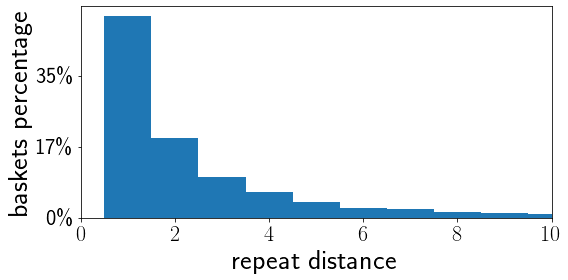

In [30]:
# plt.style.use('./plt_style.txt')
count_of_baskets_with_repeat = 0
count_of_all_baskets = 0
repeat_distance = []
for customerId, baskets in dataset.customer_baskets.items():
    customerVocab = set()
    for idx, (orderId, basket) in enumerate(baskets):
        hasRepeat = False
        distance = []
        for itemId in basket:
            if itemId in customerVocab:
                hasRepeat = True
                # find the closest repeat place
                for backIdx in range(idx-1, -1, -1):
                    thisCustomerBasket = baskets[backIdx]
                    if itemId in thisCustomerBasket[1]:
                        distance.append(idx - backIdx)
        # we choose the minimal distance to represent
        if distance:
            repeat_distance.append(min(distance))              
        if hasRepeat:
            # this basket has repeated item
            count_of_baskets_with_repeat += 1
        count_of_all_baskets += 1
        customerVocab.update(basket)

print("percentage:", count_of_baskets_with_repeat/count_of_all_baskets)
print("average repeat distance:", np.mean(repeat_distance))  


fig = plt.figure(figsize=(8,4))
ax = plt.subplot()

import matplotlib.ticker as ticker
ax.yaxis.set_major_formatter(ticker.PercentFormatter(len(repeat_distance)))

plt.hist(repeat_distance, bins=np.arange(min(repeat_distance), max(repeat_distance)+1)-0.5);
ax.set_xlim([1,15])
# ax.set_title("TaFeng: repeat distance");
ax.set_xlabel("repeat distance")
ax.set_ylabel("baskets percentage")
ax.set_xlim([0,10])
plt.tight_layout()
fig.savefig("../artifacts/Tafeng_repeat_dist.pdf", bbox_inches='tight')

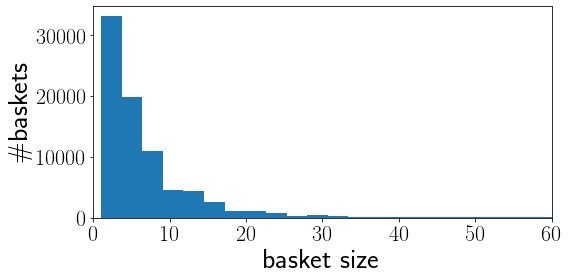

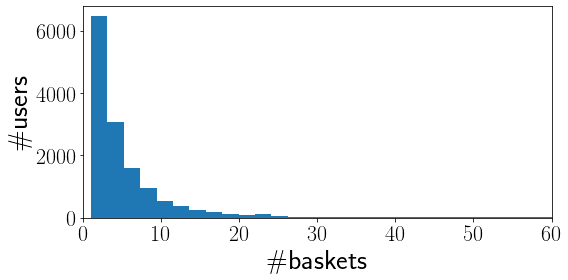

In [29]:
# plt.rc('font', family='serif')
# plt.rc('xtick', labelsize='x-small')
# plt.rc('ytick', labelsize='x-small')

fig = plt.figure(figsize=(8,4))

ax = plt.subplot()
ax.hist(basket_size_series, bins=40);
# ax.set_title("TaFeng: basket size")
ax.set_xlabel("basket size")
ax.set_ylabel("\#baskets")
ax.set_xlim([0,60])
plt.tight_layout()
fig.savefig("../artifacts/Tafeng_basket_dist.pdf", bbox_inches='tight')

fig = plt.figure(figsize=(8,4))
ax = plt.subplot()
ax.hist(baskets_per_user_series, bins=40);
# ax.set_title("TaFeng: number of baskets");
ax.set_xlabel("\#baskets")
ax.set_ylabel("\#users")
ax.set_xlim([0,60])
plt.tight_layout()
fig.savefig("../artifacts/Tafeng_basket_per_user_dist.pdf", bbox_inches='tight')


# Instacart

In [9]:
hist_file = "../data/Instacart_history.csv"
future_file = "../data/Instacart_future.csv"

hist_df = pd.read_csv(hist_file)
future_df = pd.read_csv(future_file)
hist_df

,CUSTOMER_ID,ORDER_NUMBER,MATERIAL_NUMBER
0,1,1,1
1,1,1,2
2,1,1,3
3,1,1,4
4,1,1,5
...,...,...,...
1411001,19935,50,507
1411002,19935,50,30
1411003,19935,50,4984
1411004,19935,50,7


In [10]:
num_customer = hist_df["CUSTOMER_ID"].unique().size
print("num of customers:",num_customer)

num_customer = hist_df["MATERIAL_NUMBER"].unique().size
print("num of items:",num_customer)
basket_size_series = hist_df.groupby(["CUSTOMER_ID", "ORDER_NUMBER"]).count()["MATERIAL_NUMBER"]
basket_size_avg = basket_size_series.mean()
print("avg basket size:", basket_size_avg)

baskets_per_user_series = \
hist_df[["CUSTOMER_ID", "ORDER_NUMBER"]].drop_duplicates().groupby(["CUSTOMER_ID"]).count()["ORDER_NUMBER"]
baskets_per_user_series
print("avg basket per user:", baskets_per_user_series.mean())

print("number of baskets:", hist_df[["CUSTOMER_ID", "ORDER_NUMBER"]].drop_duplicates().shape[0])

num of customers: 19935
num of items: 7999
avg basket size: 8.877992613239542
avg basket per user: 7.97256082267369
number of baskets: 158933


In [11]:
# what is the percentage of baskets with repeated purchases?
import sys
sys.path.append("..") # Adds higher directory to python modules path.

from dataset import Dataset
dataset = Dataset()
# loading real data
dataset.load_from_file(hist_file)
# convert baskets to one hot encoded

dataset.vectorize(vocabulary=dataset.item_ids)

print(dataset)


number of records in ../data/Instacart_history.csv: 1411006
customers: 19935, unique items: 7999


percentage: 0.7955805276437241
average repeat distance: 1.3751542184682548


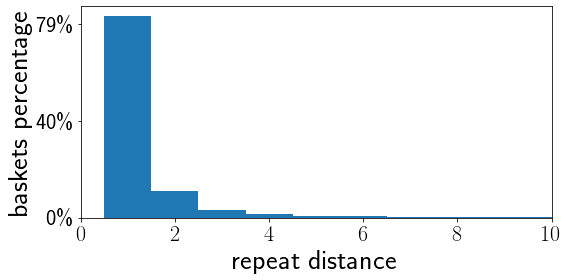

In [12]:
count_of_baskets_with_repeat = 0
count_of_all_baskets = 0
repeat_distance = []
for customerId, baskets in dataset.customer_baskets.items():
    customerVocab = set()
    for idx, (orderId, basket) in enumerate(baskets):
        hasRepeat = False
        distance = []
        for itemId in basket:
            if itemId in customerVocab:
                hasRepeat = True
                # find the closest repeat place
                for backIdx in range(idx-1, -1, -1):
                    thisCustomerBasket = baskets[backIdx]
                    if itemId in thisCustomerBasket[1]:
                        distance.append(idx - backIdx)
        # we choose the minimal distance to represent
        if distance:
            repeat_distance.append(min(distance))              
        if hasRepeat:
            # this basket has repeated item
            count_of_baskets_with_repeat += 1
        count_of_all_baskets += 1
        customerVocab.update(basket)

print("percentage:", count_of_baskets_with_repeat/count_of_all_baskets)
print("average repeat distance:", np.mean(repeat_distance))  

fig = plt.figure(figsize=(8,4))
ax = plt.subplot()

import matplotlib.ticker as ticker
ax.yaxis.set_major_formatter(ticker.PercentFormatter(len(repeat_distance)))

plt.hist(repeat_distance, bins=np.arange(min(repeat_distance), max(repeat_distance)+1)-0.5);
ax.set_xlim([1,15])
# ax.set_title("Instacart: repeat distance");
ax.set_xlabel("repeat distance")
# ax.set_ylabel("percentage of baskets")
ax.set_xlim([0,10])
ax.set_ylabel("baskets percentage")
# ax.set_xlim([0,20])
plt.tight_layout()
fig.savefig("../artifacts/Instacart_repeat_dist.pdf", bbox_inches='tight')

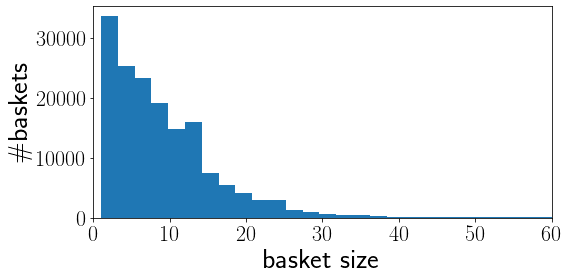

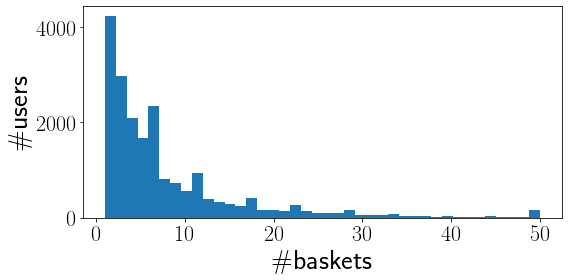

In [16]:
fig = plt.figure(figsize=(8,4))
ax = plt.subplot()
ax.hist(basket_size_series, bins=40);
# ax.set_title("Instacart: basket size")
ax.set_xlabel("basket size")
ax.set_ylabel("\#baskets")
ax.set_xlim([0,60])
plt.tight_layout()

fig.savefig("../artifacts/IS_basket_dist.pdf", bbox_inches='tight')

fig = plt.figure(figsize=(8,4))
ax = plt.subplot()
ax.hist(baskets_per_user_series, bins=40);
# ax.set_title("Instacart: number of baskets");
ax.set_xlabel("\#baskets")
ax.set_ylabel("\#users")

plt.tight_layout()

fig.savefig("../artifacts/IS_basket_per_user_dist.pdf", bbox_inches='tight')


# ValuedShopper

In [17]:
hist_file = "../data/VS_history_order.csv"
future_file = "../data/VS_future_order.csv"

hist_df = pd.read_csv(hist_file)
future_df = pd.read_csv(future_file)
hist_df

,CUSTOMER_ID,ORDER_NUMBER,MATERIAL_NUMBER
0,1,1,1
1,1,1,2
2,1,1,3
3,1,1,4
4,1,1,3
...,...,...,...
5189951,10000,79,3463
5189952,10000,79,1067
5189953,10000,79,1386
5189954,10000,79,1377


In [18]:
num_customer = hist_df["CUSTOMER_ID"].unique().size
print("num of customers:",num_customer)

num_customer = hist_df["MATERIAL_NUMBER"].unique().size
print("num of items:",num_customer)
basket_size_series = hist_df.groupby(["CUSTOMER_ID", "ORDER_NUMBER"]).count()["MATERIAL_NUMBER"]
basket_size_avg = basket_size_series.mean()
print("avg basket size:", basket_size_avg)

baskets_per_user_series = \
hist_df[["CUSTOMER_ID", "ORDER_NUMBER"]].drop_duplicates().groupby(["CUSTOMER_ID"]).count()["ORDER_NUMBER"]
baskets_per_user_series
print("avg basket per user:", baskets_per_user_series.mean())
print("number of baskets:", hist_df[["CUSTOMER_ID", "ORDER_NUMBER"]].drop_duplicates().shape[0])


num of customers: 10000
num of items: 7874
avg basket size: 9.128038088336941
avg basket per user: 56.8573
number of baskets: 568573


In [19]:
# what is the percentage of baskets with repeated purchases?
import sys
sys.path.append("..") # Adds higher directory to python modules path.

from dataset import Dataset
dataset = Dataset()
# loading real data
dataset.load_from_file(hist_file)
# convert baskets to one hot encoded

dataset.vectorize(vocabulary=dataset.item_ids)

print(dataset)


number of records in ../data/VS_history_order.csv: 5189956
customers: 10000, unique items: 7874


percentage: 0.8534823144961157
average repeat distance: 4.320685313446


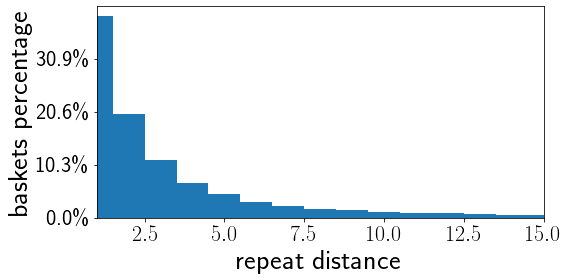

In [20]:
count_of_baskets_with_repeat = 0
count_of_all_baskets = 0
repeat_distance = []
for customerId, baskets in dataset.customer_baskets.items():
    customerVocab = set()
    for idx, (orderId, basket) in enumerate(baskets):
        hasRepeat = False
        distance = []
        for itemId in basket:
            if itemId in customerVocab:
                hasRepeat = True
                # find the closest repeat place
                for backIdx in range(idx-1, -1, -1):
                    thisCustomerBasket = baskets[backIdx]
                    if itemId in thisCustomerBasket[1]:
                        distance.append(idx - backIdx)
        # we choose the minimal distance to represent
        if distance:
            repeat_distance.append(min(distance))              
        if hasRepeat:
            # this basket has repeated item
            count_of_baskets_with_repeat += 1
        count_of_all_baskets += 1
        customerVocab.update(basket)

print("percentage:", count_of_baskets_with_repeat/count_of_all_baskets)
print("average repeat distance:", np.mean(repeat_distance))  


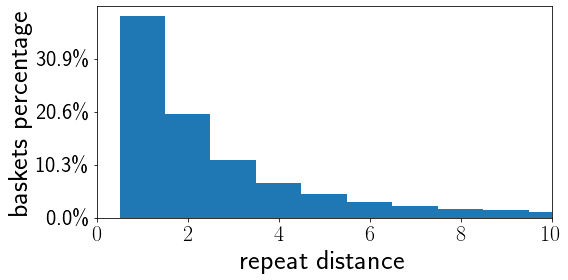

In [21]:
fig = plt.figure(figsize=(8,4))
ax = plt.subplot()

import matplotlib.ticker as ticker
ax.yaxis.set_major_formatter(ticker.PercentFormatter(len(repeat_distance)))

plt.hist(repeat_distance, bins=np.arange(min(repeat_distance), max(repeat_distance)+1)-0.5);
ax.set_xlim([1,15])
# ax.set_title("ValuedShopper: repeat distance");
ax.set_xlabel("repeat distance")
ax.set_ylabel("baskets percentage")
ax.set_xlim([0,10])
plt.tight_layout()
fig.savefig("../artifacts/VS_repeat_dist.pdf", bbox_inches='tight')

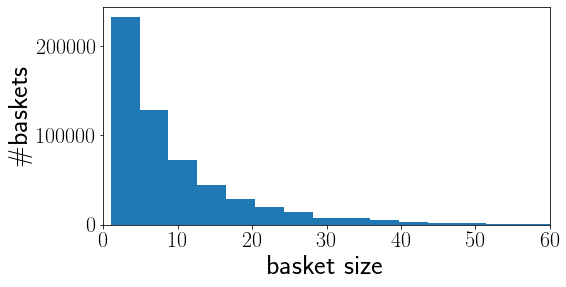

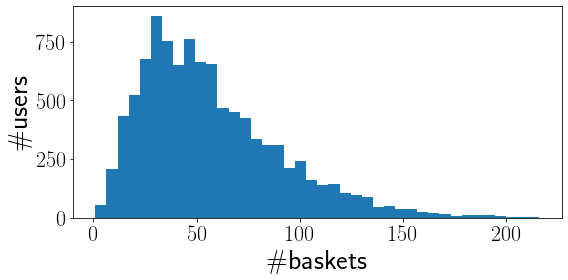

In [22]:
fig = plt.figure(figsize=(8,4))
ax = plt.subplot()
ax.hist(basket_size_series, bins=40);
# ax.set_title("ValuedShopper: basket size")
ax.set_xlabel("basket size")
ax.set_ylabel("\#baskets")
ax.set_xlim([0,60])
fig.savefig("../artifacts/ValuedShopper_basket_dist.pdf", bbox_inches='tight')

fig = plt.figure(figsize=(8,4))
ax = plt.subplot()
ax.hist(baskets_per_user_series, bins=40);
# ax.set_title("ValuedShopper: number of baskets");
ax.set_xlabel("\#baskets")
ax.set_ylabel("\#users")
plt.tight_layout()
fig.savefig("../artifacts/ValuedShopper_basket_per_user_dist.pdf", bbox_inches='tight')
